In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import sys
from imp import reload
sys.path.append('..')
import support.data_functions as dfunc
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
sns.set_context("talk", font_scale=1.4)

import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from statsmodels.iolib.table import SimpleTable

In [3]:
city_unem, aggcity = dfunc.load_city_unemployment()

In [71]:
def tableRestricter(summary, dropFE=False, alpha=None):
    '''
    Drops fixed effects or nonsignificant predictors
    '''
    tblheader = summary.tables[1].data[0]
    tbldata = []
    for r in summary.tables[1].data[1:]:
        if dropFE == True:
            if 'C(' in r[0]:
                continue
            else:
                pass
        if alpha != None:
            if float(r[-2]) < alpha:
                tbldata.append(r)
        else:
            tbldata.append(r)
    #Add back in our restricted table
    summary.tables[1] = SimpleTable(tbldata, tblheader)
    return summary

def pullFE(summary):
    '''
    Drops fixed effects or nonsignificant predictors
    '''
    tblheader = summary.tables[1].data[0]
    tbldata = []
    for r in summary.tables[1].data[1:]:
        if 'C(' in r[0]:
            pass
        else:
            continue
    #Add back in our restricted table
    summary.tables[1] = SimpleTable(tbldata, tblheader)
    return summary

In [5]:
reload(dfunc)
df = dfunc.produce_merged_dataframe(census_inference = True)

In [6]:
df.head()

,Year,State,City,TotalPop,WhitePop,WhitePopFrac,WhitePopYoY,WhitePopSlope,BlackPop,BlackPopFrac,...,TotalPopSlope,Region,Murder,Robbery,Assault,Burglary,MurderRate,RobberyRate,AssaultRate,BurglaryRate
0,1960,AL,Birmingham,96600.857143,58880.928575,0.609528,NaN,-0.008055,30534.464189,0.316089,...,-494.654286,Southeast,175,507,2309,4073,18.115781,52.484006,239.024794,421.631870
1,1961,AL,Birmingham,96106.202857,57957.156075,0.603053,-0.006475,-0.008055,32075.622939,0.333752,...,-494.654286,Southeast,151,303,1802,4052,15.711785,31.527622,187.500905,421.616907
2,1962,AL,Birmingham,95611.548571,57034.997147,0.596528,-0.006525,-0.008055,33565.818474,0.351064,...,-494.654286,Southeast,159,524,1332,4183,16.629790,54.805095,139.313715,437.499451
3,1963,AL,Birmingham,95116.894286,56114.451790,0.589953,-0.006576,-0.008055,35005.050796,0.368021,...,-494.654286,Southeast,141,305,1892,5360,14.823865,32.065807,198.913139,563.517138
4,1964,AL,Birmingham,94622.240000,55195.520004,0.583325,-0.006628,-0.008055,36393.319903,0.384617,...,-494.654286,Southeast,130,611,2042,6957,13.738842,64.572557,215.805502,735.239411


In [7]:
races = ['WhitePop', 'NativePop', 'HispanicPop', 'BlackPop', 'TotalPop']

In [8]:
mildf = df[df.City == 'Milwaukee']
for r in races:
    mildf[r + 'PctChange'] = mildf[r].pct_change()

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [9]:
df[df.State == 'CA']

,Year,State,City,TotalPop,WhitePop,WhitePopFrac,WhitePopYoY,WhitePopSlope,BlackPop,BlackPopFrac,...,TotalPopSlope,Region,Murder,Robbery,Assault,Burglary,MurderRate,RobberyRate,AssaultRate,BurglaryRate
204,1960,CA,LosAngeles,7.676605e+05,548062.535072,0.713939,NaN,-0.006832,130815.821066,0.170408,...,11946.265714,Pacific,689,11722,20372,91239,8.975321,152.697705,265.377721,1188.533175
205,1961,CA,LosAngeles,7.796068e+05,555881.317036,0.713028,-0.000911,-0.006832,134774.987316,0.172876,...,11946.265714,Pacific,647,11563,20078,91259,8.299055,148.318359,257.540086,1170.577286
206,1962,CA,LosAngeles,7.915531e+05,563361.335072,0.711716,-0.001311,-0.006832,138542.832494,0.175027,...,11946.265714,Pacific,636,12823,21147,94785,8.034837,161.997985,267.158340,1197.456056
207,1963,CA,LosAngeles,8.034993e+05,570502.589179,0.710022,-0.001694,-0.006832,142119.356601,0.176876,...,11946.265714,Pacific,665,13200,21905,105983,8.276298,164.281408,272.620019,1319.017916
208,1964,CA,LosAngeles,8.154456e+05,577305.079358,0.707963,-0.002060,-0.006832,145504.559637,0.178436,...,11946.265714,Pacific,809,14122,22429,107369,9.920956,173.181390,275.052074,1316.691166
209,1965,CA,LosAngeles,8.273919e+05,583768.805607,0.705553,-0.002410,-0.006832,148698.441601,0.179719,...,11946.265714,Pacific,909,16383,22364,127917,10.986330,198.007751,270.295144,1546.026827
210,1966,CA,LosAngeles,8.393381e+05,589893.767929,0.702808,-0.002745,-0.006832,151701.002494,0.180739,...,11946.265714,Pacific,861,16217,24470,139439,10.258083,193.211766,291.539244,1661.297122
211,1967,CA,LosAngeles,8.512844e+05,595679.966321,0.699743,-0.003066,-0.006832,154512.242316,0.181505,...,11946.265714,Pacific,1062,20701,27048,147698,12.475267,243.173731,317.731660,1735.001873
212,1968,CA,LosAngeles,8.632306e+05,601127.400786,0.696369,-0.003373,-0.006832,157132.161066,0.182028,...,11946.265714,Pacific,1235,23526,31596,159884,14.306721,272.534345,366.020368,1852.158517
213,1969,CA,LosAngeles,8.751769e+05,606236.071321,0.692701,-0.003668,-0.006832,159560.758744,0.182318,...,11946.265714,Pacific,1258,25171,38247,165508,14.374237,287.610420,437.020211,1891.137633


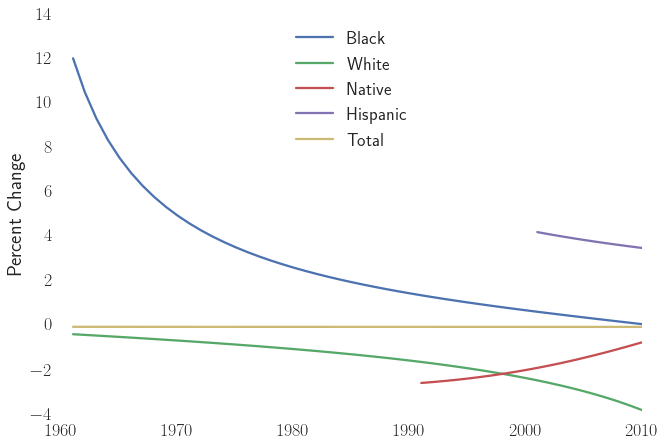

In [10]:
plotdata = {}
years = [1960, 1970, 1980, 1990, 2000, 2010]
subdf = mildf[[x for x in mildf.columns if 'Pct' in x]]
for col in subdf.columns:
    key = col.split('Pop')[0]
    plotdata[key] = []
    for y, v in zip(mildf['Year'].values, subdf[col].values):
        plotdata[key].append([y, v*100])
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='white')
ax.grid(b=False)
for r, dset in plotdata.items():
    ax.plot([x[0] for x in dset], [y[1] for y in dset], label=r) 
#ax.set_ylim(-40, 130)
ax.set_ylabel('Percent Change')
ax.legend(loc=9, frameon=False)
plt.savefig('milwaukee_ethnicity.eps')

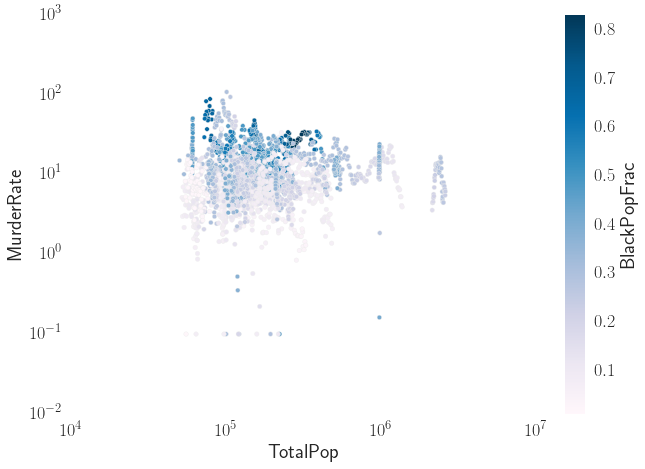

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, axisbg='white')
#Change the zeros to 0.001 to work with log
df.MurderRate = df.MurderRate + 0.1
df[df.MurderRate != 0].plot(ax = ax, kind='scatter', x='TotalPop', y='MurderRate',  c='BlackPopFrac', \
                              loglog=True, cmap='PuBu')

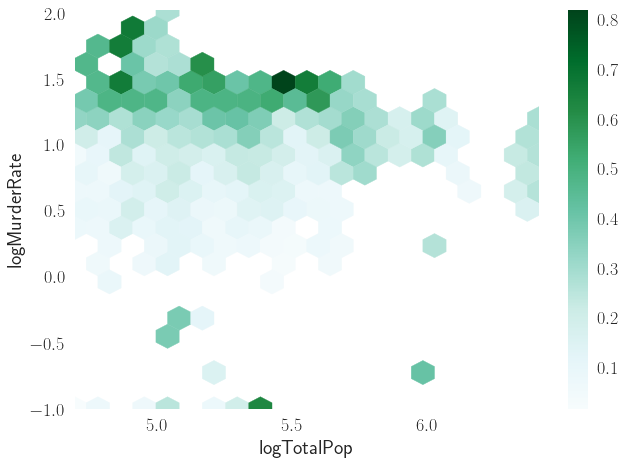

In [12]:
df['logTotalPop'] = np.log10(df['TotalPop'])
df['logMurderRate'] = np.log10(df['MurderRate'])


fig = plt.figure()
ax = fig.add_subplot(111, axisbg='white')
ax.grid(b'False')
df.plot.hexbin('logTotalPop', 'logMurderRate', C='BlackPopFrac', gridsize = 20, ax = ax)

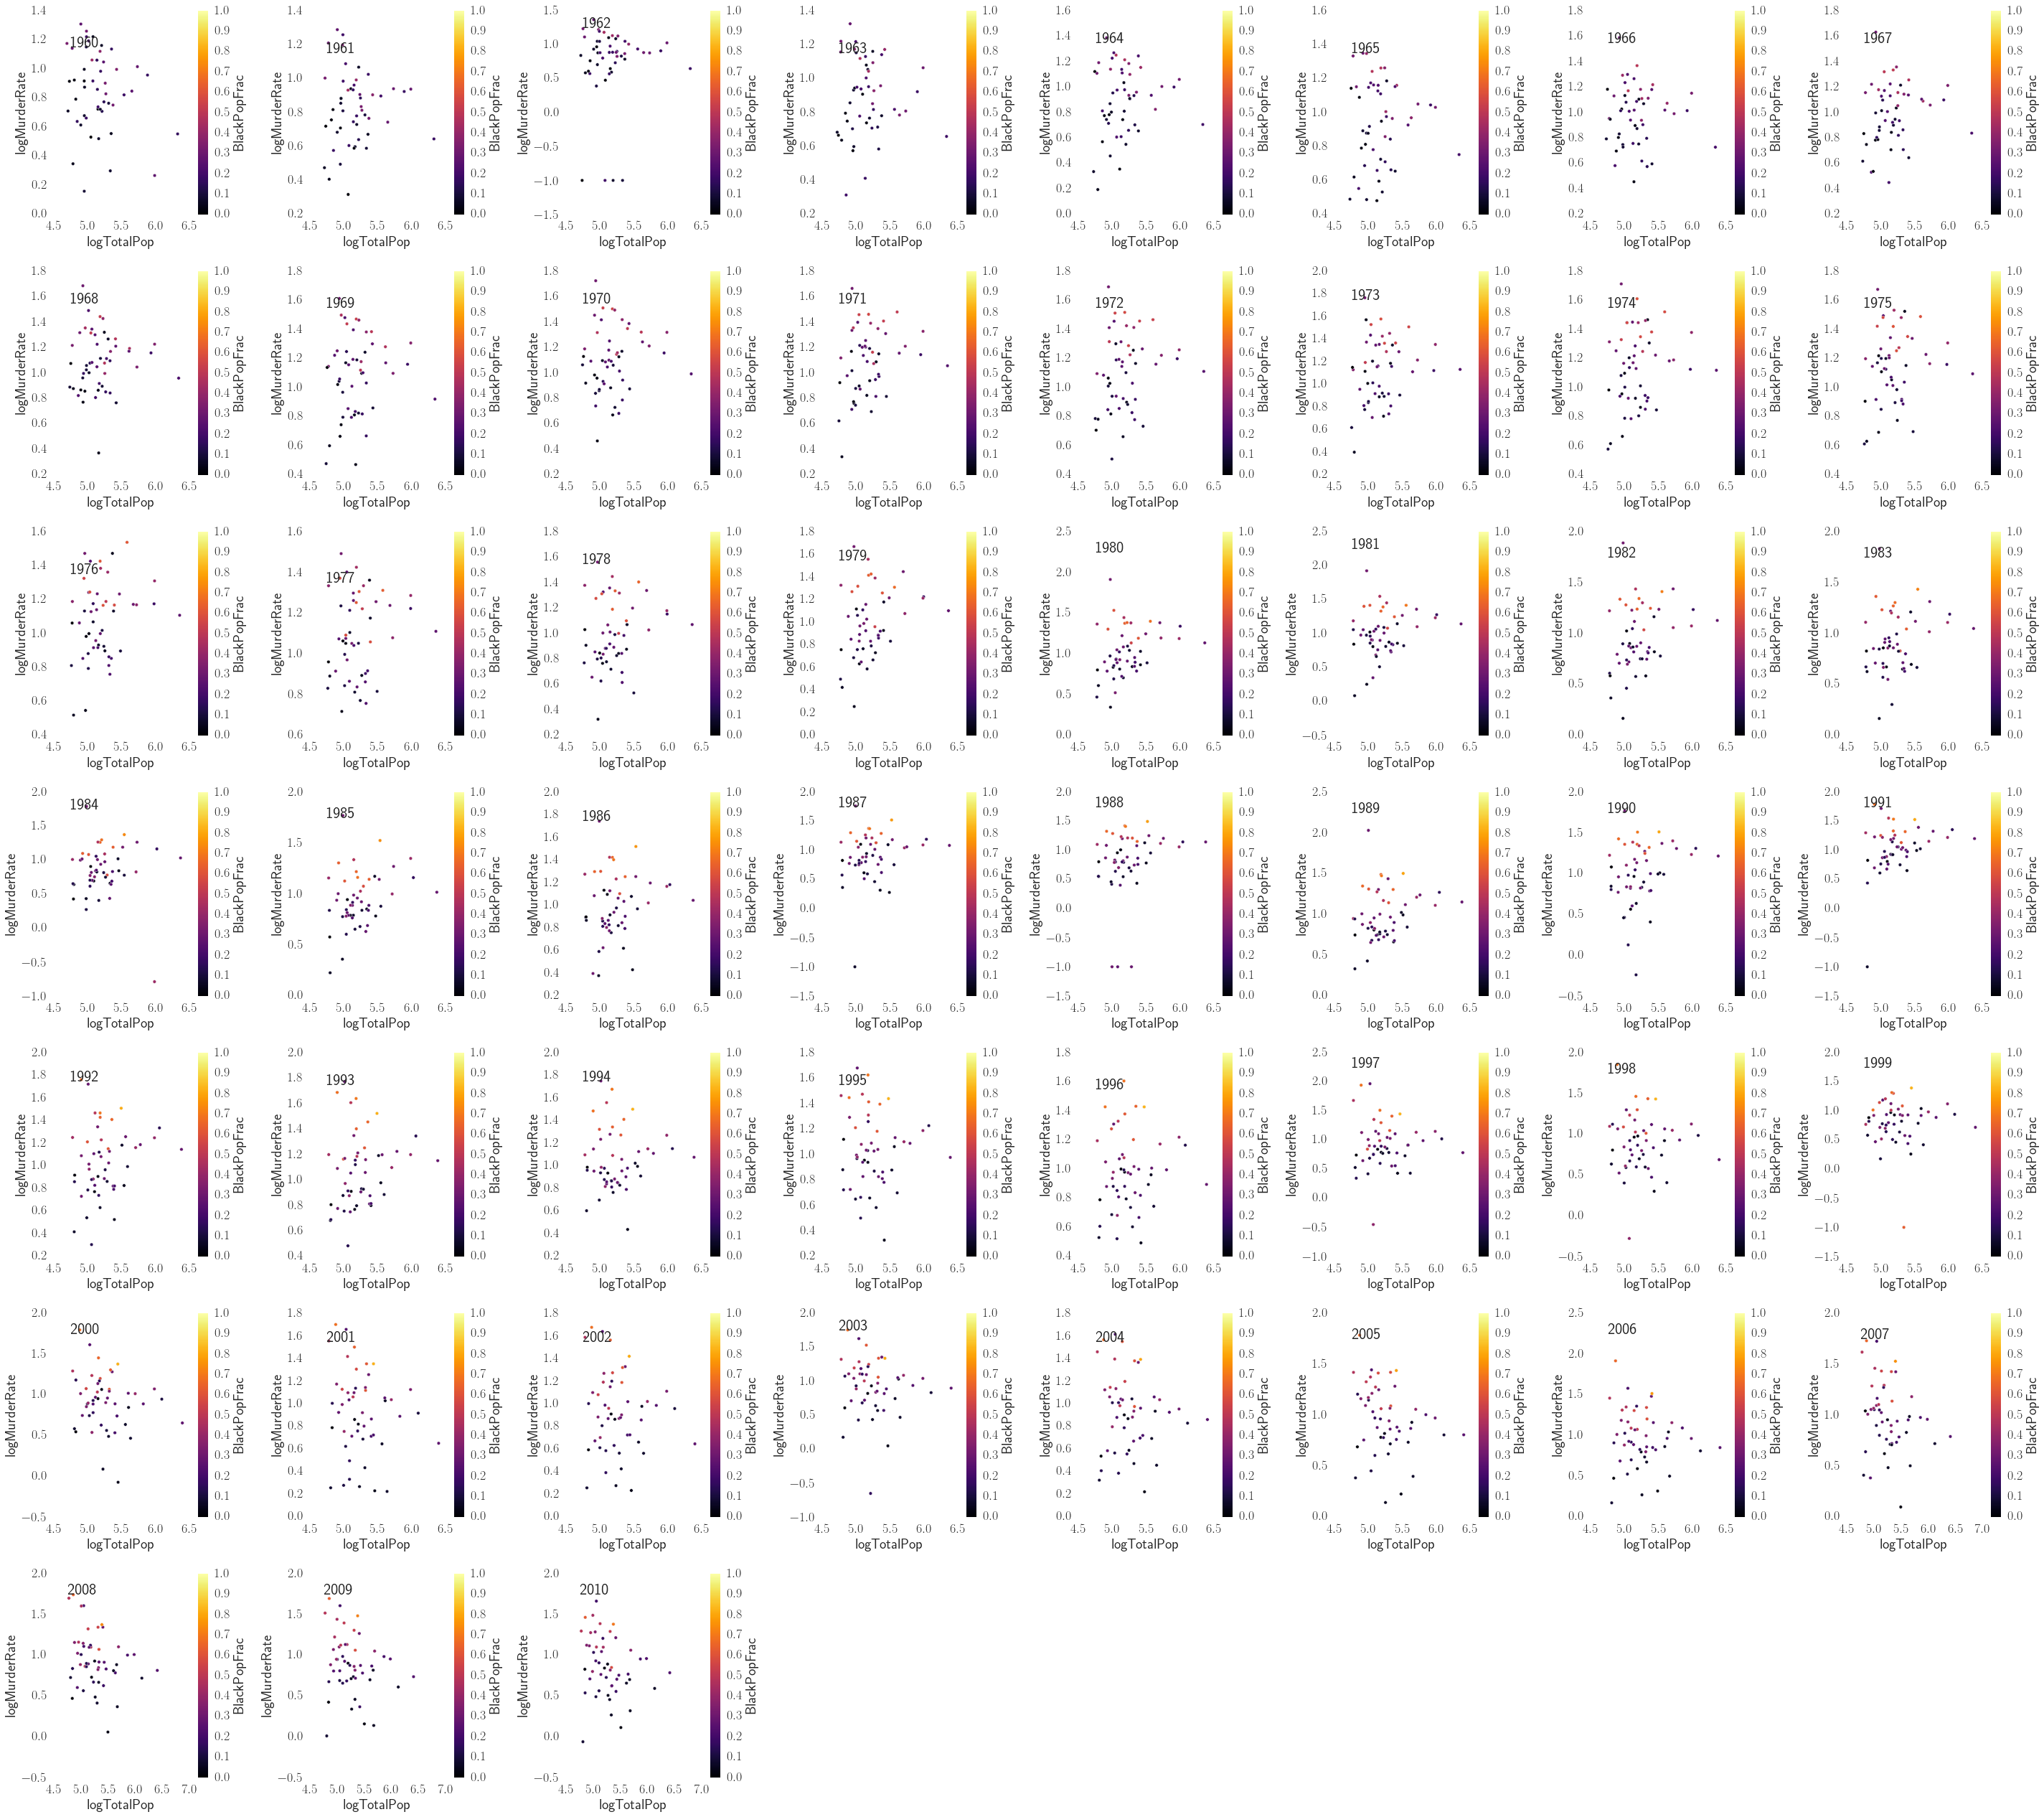

In [13]:
year = df.Year.unique()
fig = plt.figure(figsize = (40, 40))
for i in range(len(year)):
    ax = fig.add_subplot(8, 8, i+1, axisbg='white')
    df[df.Year == year[i]].plot(kind='scatter', x = 'logTotalPop', y = 'logMurderRate', c='BlackPopFrac', \
                                     cmap='inferno', vmin=0, vmax = 1, ax = ax)
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    ax.text(xmin+0.25, ymax - 0.25, year[i])
plt.tight_layout()
plt.savefig('temp.eps')

# White Population

Running the white population rate separately

In [14]:
smf.ols('MurderRate ~ WhitePopFrac', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     548.0
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          6.21e-110
Time:                        11:21:15   Log-Likelihood:                -9219.7
No. Observations:                2550   AIC:                         1.844e+04
Df Residuals:                    2548   BIC:                         1.846e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       27.7985      0.690     40.309      0.000        26.446    29.151
WhitePopFrac   -23.6096      1.009    -23.409      0.000       -25.587   -21.632
==============================================================================
Omnibus:                     1797.428   Durbin-Watson:                   0.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38874.128
Skew:                           3.073   Prob(JB):                         0.00
Kurtosis:                      21.113   Cond. No.                         8.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adding in the population slope for the white population (WhitePopSlope is the fitted slope param from the census data)

In [15]:
smf.ols('MurderRate ~ WhitePopFrac + WhitePopSlope', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     392.5
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          2.60e-149
Time:                        11:21:15   Log-Likelihood:                -9125.5
No. Observations:                2550   AIC:                         1.826e+04
Df Residuals:                    2547   BIC:                         1.827e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        36.3673      0.904     40.210      0.000        34.594    38.141
WhitePopFrac    -27.0618      1.003    -26.978      0.000       -29.029   -25.095
WhitePopSlope  1080.6416     77.341     13.972      0.000       928.984  1232.299
==============================================================================
Omnibus:                     1644.810   Durbin-Watson:                   0.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30386.443
Skew:                           2.755   Prob(JB):                         0.00
Kurtosis:                      18.988   Cond. No.                         541.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Black

In [16]:
smf.ols('MurderRate ~ BlackPopFrac', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     1134.
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          5.95e-206
Time:                        11:21:15   Log-Likelihood:                -8998.7
No. Observations:                2550   AIC:                         1.800e+04
Df Residuals:                    2548   BIC:                         1.801e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        4.3409      0.285     15.233      0.000         3.782     4.900
BlackPopFrac    30.8075      0.915     33.674      0.000        29.013    32.601
==============================================================================
Omnibus:                     2066.639   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64969.570
Skew:                           3.640   Prob(JB):                         0.00
Kurtosis:                      26.632   Cond. No.                         5.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
smf.ols('MurderRate ~ BlackPopFrac + BlackPopSlope', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     676.9
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          1.78e-236
Time:                        11:21:15   Log-Likelihood:                -8924.6
No. Observations:                2550   AIC:                         1.786e+04
Df Residuals:                    2547   BIC:                         1.787e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         4.1913      0.277     15.124      0.000         3.648     4.735
BlackPopFrac     39.0267      1.110     35.144      0.000        36.849    41.204
BlackPopSlope -1084.0329     87.798    -12.347      0.000     -1256.195  -911.871
==============================================================================
Omnibus:                     1958.068   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55398.687
Skew:                           3.385   Prob(JB):                         0.00
Kurtosis:                      24.807   Cond. No.                         571.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# All together support

In [18]:
def dummifier(val):
    if val > 0:
        return 1
    else:
        return 0
    
df['HispanicDummy'] =  df.HispanicPopFrac.apply(dummifier)

rdf = df[:]
rdf['HispanicPopFrac'] = df['HispanicPopFrac'].replace(np.nan, 0)
rdf.HispanicPopFrac = df['HispanicPopFrac'].replace(np.nan, 0)

# All together

In [19]:
tableRestricter(smf.ols('MurderRate ~ TotalPop + WhitePopFrac + BlackPopFrac + C(Year)', data = df).fit().summary(),
                dropFE=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     26.01
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          2.69e-197
Time:                        11:21:16   Log-Likelihood:                -8907.4
No. Observations:                2550   AIC:                         1.792e+04
Df Residuals:                    2496   BIC:                         1.824e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
======================================================================
                coef     std err      t     P>|t|   [95.0% Conf. Int.]
----------------------------------------------------------------------
 Intercept       9.6687     2.352     4.110  0.000     5.056    14.282
  TotalPop    -1.63e-06  4.75e-07    -3.434  0.001 -2.56e-06 -6.99e-07
WhitePopFrac    -6.8386     2.295    -2.980  0.003   -11.339    -2.339
BlackPopFrac    25.9986     1.967    13.214  0.000    22.141    29.857
==============================================================================
Omnibus:                     2185.745   Durbin-Watson:                   0.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81838.077
Skew:                           3.905   Prob(JB):                         0.00
Kurtosis:                      29.632   Cond. No.                     2.29e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Add a dummy for Hispanic

In [20]:
tableRestricter(smf.ols('logMurderRate ~ BlackPopFrac + WhitePopFrac + HispanicPopFrac:HispanicDummy + C(Year)', 
                data = rdf, missing='drop').fit().summary(), dropFE = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          logMurderRate   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     32.46
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          1.24e-241
Time:                        11:21:16   Log-Likelihood:                -137.44
No. Observations:                2550   AIC:                             382.9
Df Residuals:                    2496   BIC:                             698.4
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                                 coef     std err      t     P>|t|   [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
          Intercept               0.7620     0.074    10.357  0.000     0.618     0.906
         BlackPopFrac             1.0242     0.065    15.818  0.000     0.897     1.151
         WhitePopFrac            -0.1043     0.072    -1.445  0.149    -0.246     0.037
HispanicPopFrac:HispanicDummy     0.1863     0.073     2.565  0.010     0.044     0.329
==============================================================================
Omnibus:                      992.769   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14167.221
Skew:                          -1.442   Prob(JB):                         0.00
Kurtosis:                      14.181   Cond. No.                         64.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Once the missing hispanic population has been properly controlled for (dummy to account for missing data, imputing nan to 0 so that it doesn't crash the Year FE) there is no difference in the fit of the model

In [76]:
def pullFE(summary):
    '''
    Drops fixed effects or nonsignificant predictors
    '''
    tblheader = summary.tables[1].data[0]
    tbldata = []
    for r in summary.tables[1].data[1:]:
        if 'C(' in r[0]:
            pass
        else:
            continue
        tbldata.append(r)
    #Add back in our restricted table
    summary.tables[1] = SimpleTable(tbldata, tblheader)
    return summary

modFE = pullFE(smf.ols('logMurderRate ~ TotalPop + BlackPopFrac + HispanicPopFrac:HispanicDummy + C(Year)', 
                data = rdf).fit().summary() )

In [92]:
with open('modFE.csv', 'w') as wfile:
    print(modFE.tables[1].as_csv(), file=wfile)
    


0    -0.0350
1    -0.1259
2     0.0161
3     0.0122
4     0.0450
5     0.0845
6     0.0858
7     0.1756
8     0.1678
9     0.1770
10    0.1595
11    0.1751
12    0.1835
13    0.1934
14    0.1979
15    0.1298
16    0.1331
17    0.0340
18    0.0311
19    0.0583
20    0.0376
21   -0.0142
22   -0.0562
23   -0.1218
24   -0.0357
25    0.0147
26   -0.0767
27   -0.1652
28    0.0064
29    0.0203
30    0.0563
31    0.0474
32    0.0862
33    0.0587
34    0.0422
35   -0.0093
36   -0.0605
37   -0.0975
38   -0.1841
39   -0.0995
40   -0.0982
41   -0.0932
42   -0.0943
43   -0.0922
44   -0.0432
45   -0.0373
46   -0.0199
47   -0.0594
48   -0.1077
49   -0.1236
Name:    coef   , dtype: float64

In [65]:
tableRestricter(smf.ols('logMurderRate ~ TotalPop + BlackPopFrac + WhitePopFrac + HispanicPopFrac:HispanicDummy + C(Year)', 
                data = rdf, missing='drop').fit().summary(), dropFE = False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          logMurderRate   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     31.85
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          6.66e-241
Time:                        11:40:31   Log-Likelihood:                -137.37
No. Observations:                2550   AIC:                             384.7
Df Residuals:                    2495   BIC:                             706.2
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                                 coef     std err      t     P>|t|   [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
          Intercept               0.7526     0.078     9.636  0.000     0.599     0.906
       C(Year)[T.1961]           -0.0342     0.052    -0.662  0.508    -0.135     0.067
       C(Year)[T.1962]           -0.1244     0.052    -2.409  0.016    -0.226    -0.023
       C(Year)[T.1963]            0.0182     0.052     0.352  0.725    -0.083     0.120
       C(Year)[T.1964]            0.0149     0.052     0.289  0.773    -0.086     0.116
       C(Year)[T.1965]            0.0482     0.052     0.931  0.352    -0.053     0.150
       C(Year)[T.1966]            0.0881     0.052     1.704  0.089    -0.013     0.190
       C(Year)[T.1967]            0.0898     0.052     1.734  0.083    -0.012     0.191
       C(Year)[T.1968]            0.1799     0.052     3.474  0.001     0.078     0.281
       C(Year)[T.1969]            0.1723     0.052     3.328  0.001     0.071     0.274
       C(Year)[T.1970]            0.1817     0.052     3.508  0.000     0.080     0.283
       C(Year)[T.1971]            0.1644     0.052     3.171  0.002     0.063     0.266
       C(Year)[T.1972]            0.1801     0.052     3.474  0.001     0.078     0.282
       C(Year)[T.1973]            0.1885     0.052     3.635  0.000     0.087     0.290
       C(Year)[T.1974]            0.1984     0.052     3.826  0.000     0.097     0.300
       C(Year)[T.1975]            0.2029     0.052     3.912  0.000     0.101     0.305
       C(Year)[T.1976]            0.1346     0.052     2.596  0.009     0.033     0.236
       C(Year)[T.1977]            0.1378     0.052     2.657  0.008     0.036     0.239
       C(Year)[T.1978]            0.0385     0.052     0.743  0.458    -0.063     0.140
       C(Year)[T.1979]            0.0354     0.052     0.683  0.495    -0.066     0.137
       C(Year)[T.1980]            0.0624     0.052     1.203  0.229    -0.039     0.164
       C(Year)[T.1981]            0.0414     0.052     0.799  0.424    -0.060     0.143
       C(Year)[T.1982]           -0.0108     0.052    -0.208  0.835    -0.112     0.091
       C(Year)[T.1983]           -0.0531     0.052    -1.026  0.305    -0.155     0.048
       C(Year)[T.1984]           -0.1191     0.052    -2.300  0.022    -0.221    -0.018
       C(Year)[T.1985]           -0.0334     0.052    -0.646  0.518    -0.135     0.068
       C(Year)[T.1986]            0.0165     0.052     0.318  0.751    -0.085     0.118
       C(Year)[T.1987]           -0.0754     0.052    -1.457  0.145    -0.177     0.026
       C(Year)[T.1988]           -0.1645     0.052    -3.178  0.001    -0.266    -0.063
       C(Year)[T.1989]            0.0066     0.052     0.127  0.899    -0.095     0.108
       C(Year)[T.1990]            0.0198     0.052     0.382  0.702    -0.082     0.121
       C(Year)[T.1991]            0.0552     0.052     1.066  0.287    -0.046     0.157
   

And now we find that the total population is not significant if we add in the hispanic population (so there was excess variance in the data that was previously being fit to the Total Population coming from the 2000s onwards).

In [22]:
tableRestricter(smf.ols('MurderRate ~ TotalPop + BlackPopFrac + WhitePopFrac + HispanicPopFrac:HispanicDummy + C(Year)', 
                data = rdf, missing='drop').fit().summary(), dropFE = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     25.91
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          1.85e-199
Time:                        11:21:16   Log-Likelihood:                -8900.4
No. Observations:                2550   AIC:                         1.791e+04
Df Residuals:                    2495   BIC:                         1.823e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                                 coef     std err      t     P>|t|   [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
          Intercept               7.3661     2.427     3.035  0.002     2.607    12.125
           TotalPop           -1.741e-06  4.75e-07    -3.669  0.000 -2.67e-06 -8.11e-07
         BlackPopFrac            28.7553     2.098    13.704  0.000    24.641    32.870
         WhitePopFrac            -4.3465     2.385    -1.822  0.069    -9.024     0.331
HispanicPopFrac:HispanicDummy     8.3966     2.262     3.712  0.000     3.961    12.832
==============================================================================
Omnibus:                     2171.338   Durbin-Watson:                   0.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81099.978
Skew:                           3.864   Prob(JB):                         0.00
Kurtosis:                      29.525   Cond. No.                     2.29e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Unemployment and population

Right now unemployment is restricted to 1990 onwards so patterns and inference should be **strongly limited**

Since this needs to be a comparison only on a modern period I first re-run the previous results to establish a baseline

In [23]:
mrdf = rdf[rdf.Year >= 1990]
tableRestricter(smf.ols('MurderRate ~ TotalPop + BlackPopFrac + WhitePopFrac + HispanicPopFrac:HispanicDummy + C(Year)', 
                data = mrdf, missing='drop').fit().summary(), dropFE = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     29.80
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          1.62e-100
Time:                        11:21:16   Log-Likelihood:                -3730.7
No. Observations:                1050   AIC:                             7511.
Df Residuals:                    1025   BIC:                             7635.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                                 coef     std err      t     P>|t|   [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
          Intercept              -4.4074     3.432    -1.284  0.199   -11.143     2.328
           TotalPop           -1.557e-06  7.62e-07    -2.042  0.041 -3.05e-06 -6.05e-08
         BlackPopFrac            44.1024     3.063    14.399  0.000    38.092    50.113
         WhitePopFrac             9.1403     3.600     2.539  0.011     2.075    16.205
HispanicPopFrac:HispanicDummy    15.1011     2.562     5.894  0.000    10.074    20.128
==============================================================================
Omnibus:                      752.628   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13991.204
Skew:                           3.097   Prob(JB):                         0.00
Kurtosis:                      19.776   Cond. No.                     1.17e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
tableRestricter(smf.ols('MurderRate ~ TotalPop + BlackPopFrac + WhitePopFrac + HispanicPopFrac:HispanicDummy + C(Year) -1', 
                data = mrdf, missing='drop').fit().summary(), dropFE = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     29.80
Date:                Fri, 07 Apr 2017   Prob (F-statistic):          1.62e-100
Time:                        11:39:36   Log-Likelihood:                -3730.7
No. Observations:                1050   AIC:                             7511.
Df Residuals:                    1025   BIC:                             7635.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                                 coef     std err      t     P>|t|   [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
           TotalPop           -1.557e-06  7.62e-07    -2.042  0.041 -3.05e-06 -6.05e-08
         BlackPopFrac            44.1024     3.063    14.399  0.000    38.092    50.113
         WhitePopFrac             9.1403     3.600     2.539  0.011     2.075    16.205
HispanicPopFrac:HispanicDummy    15.1011     2.562     5.894  0.000    10.074    20.128
==============================================================================
Omnibus:                      752.628   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13991.204
Skew:                           3.097   Prob(JB):                         0.00
Kurtosis:                      19.776   Cond. No.                     2.62e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we restrict to the modern period the adjusted R^2 increases

In [57]:
urdf = pd.merge(rdf, aggcity, on=['Year', 'State', 'City'], how='left')

In [58]:
urdf['UnemDummy'] = urdf.Unemployment.apply(dummifier)

In [59]:
urdf.Year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [93]:
eqn = 'MurderRate ~ TotalPop + BlackPopFrac' +\
      '+ HispanicPopFrac:HispanicDummy + Unemployment:UnemDummy + C(Year)'
tableRestricter(smf.ols(eqn, data = urdf).fit().summary(), dropFE = False)
unemfe = pullFE(smf.ols(eqn, data = urdf).fit().summary())
with open('unemFE.csv', 'w') as wfile:
    print(unemfe.tables[1].as_csv(), file=wfile)

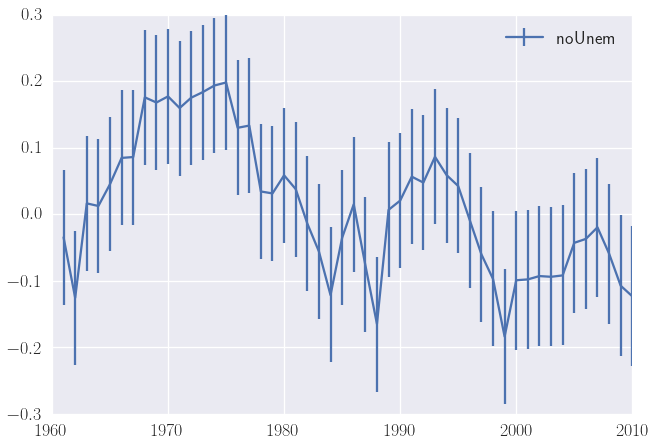

In [111]:
mfe = pd.read_csv('modFE.csv')
ufe = pd.read_csv('unemFE.csv')
plt.errorbar(urdf.Year.unique()[1:], mfe[mfe.columns[1]], yerr = [los, his], label = 'noUnem')
#plt.plot(urdf.Year.unique()[1:], ufe[ufe.columns[1]], label='Unem')
plt.legend(loc='best')

In [110]:
los, his = [], []
for v, x in zip(mfe[mfe.columns[1]], mfe[mfe.columns[-1]].values):
    split = x.lstrip(' ').split(' ')
    lo, hi = float(split[0]), float(split[-1])
    los.append(v-lo)
    his.append(hi-v)

In [109]:
his

[0.066,
 -0.025,
 0.117,
 0.113,
 0.146,
 0.186,
 0.187,
 0.277,
 0.269,
 0.278,
 0.261,
 0.276,
 0.285,
 0.295,
 0.299,
 0.231,
 0.234,
 0.135,
 0.133,
 0.16,
 0.139,
 0.087,
 0.045,
 -0.02,
 0.066,
 0.116,
 0.025,
 -0.064,
 0.108,
 0.122,
 0.158,
 0.149,
 0.188,
 0.16,
 0.144,
 0.092,
 0.041,
 0.004,
 -0.083,
 0.005,
 0.006,
 0.012,
 0.011,
 0.013,
 0.062,
 0.068,
 0.085,
 0.046,
 -0.002,
 -0.018]

In [26]:
eqn = 'MurderRate ~ TotalPop + BlackPopFrac + WhitePopFrac' +\
      '+ HispanicPopFrac:HispanicDummy + Unemployment + C(Year)'
tableRestricter(smf.ols(eqn, 
                data = urdf, missing='drop').fit().summary(), dropFE = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     18.44
Date:                Fri, 07 Apr 2017   Prob (F-statistic):           3.47e-92
Time:                        11:21:16   Log-Likelihood:                -3755.2
No. Observations:                1059   AIC:                             7590.
Df Residuals:                    1019   BIC:                             7789.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                                 coef     std err      t     P>|t|   [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
          Intercept              -1.9635     9.447    -0.208  0.835   -20.501    16.574
           TotalPop           -1.503e-06  7.63e-07    -1.970  0.049    -3e-06 -5.91e-09
         BlackPopFrac            44.5794     3.076    14.493  0.000    38.544    50.615
         WhitePopFrac            10.2635     3.632     2.826  0.005     3.136    17.391
HispanicPopFrac:HispanicDummy    14.9240     2.574     5.797  0.000     9.873    19.975
         Unemployment            -0.0001  9.69e-05    -1.456  0.146    -0.000  4.91e-05
==============================================================================
Omnibus:                      764.114   Durbin-Watson:                   0.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14567.882
Skew:                           3.119   Prob(JB):                         0.00
Kurtosis:                      20.066   Cond. No.                     1.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
eqn = 'MurderRate ~ TotalPop + BlackPopFrac + WhitePopFrac' +\
      '+ HispanicPopFrac:HispanicDummy + Unemployment + C(Year) -1'
tableRestricter(smf.ols(eqn, 
                data = urdf, missing='drop').fit().summary(), dropFE = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     18.44
Date:                Fri, 07 Apr 2017   Prob (F-statistic):           3.47e-92
Time:                        11:21:16   Log-Likelihood:                -3755.2
No. Observations:                1059   AIC:                             7590.
Df Residuals:                    1019   BIC:                             7789.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                                 coef     std err      t     P>|t|   [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
           TotalPop           -1.503e-06  7.63e-07    -1.970  0.049    -3e-06 -5.91e-09
         BlackPopFrac            44.5794     3.076    14.493  0.000    38.544    50.615
         WhitePopFrac            10.2635     3.632     2.826  0.005     3.136    17.391
HispanicPopFrac:HispanicDummy    14.9240     2.574     5.797  0.000     9.873    19.975
         Unemployment            -0.0001  9.69e-05    -1.456  0.146    -0.000  4.91e-05
==============================================================================
Omnibus:                      764.114   Durbin-Watson:                   0.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14567.882
Skew:                           3.119   Prob(JB):                         0.00
Kurtosis:                      20.066   Cond. No.                     4.37e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

And adding in unemployment leads to a marginal decrease in the adjusted R^2 (also not significant)

And just out of being cheeky to that original editor

In [28]:
eqn = 'MurderRate ~ Unemployment + C(Year)'
tableRestricter(smf.ols(eqn, 
                data = urdf, missing='drop').fit().summary(), dropFE = True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MurderRate   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.089
Date:                Fri, 07 Apr 2017   Prob (F-statistic):              0.333
Time:                        11:21:16   Log-Likelihood:                -4018.7
No. Observations:                1059   AIC:                             8109.
Df Residuals:                    1023   BIC:                             8288.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
======================================================================
                coef     std err      t     P>|t|   [95.0% Conf. Int.]
----------------------------------------------------------------------
 Intercept      12.8433    10.948     1.173  0.241    -8.639    34.326
Unemployment    -0.0005     0.000    -3.707  0.000    -0.001    -0.000
==============================================================================
Omnibus:                      648.085   Durbin-Watson:                   0.415
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6371.501
Skew:                           2.721   Prob(JB):                         0.00
Kurtosis:                      13.714   Cond. No.                     5.44e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Unemployment on its own is significant, but it has no predictive power

# Veterans

In [29]:
reload(dfunc)
qq = dfunc.load_veteran_incarceration()

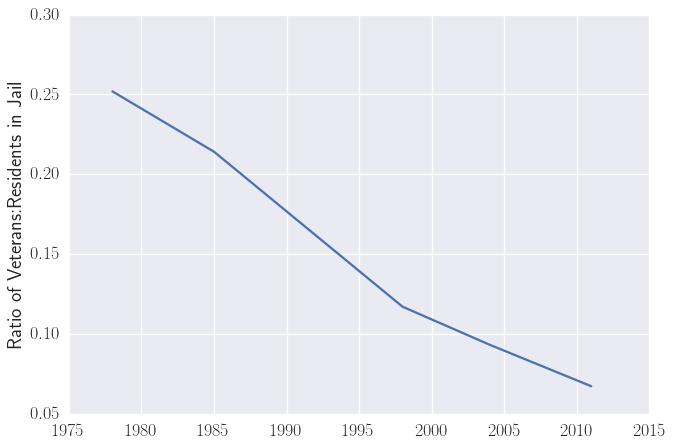

In [30]:
plt.plot(qq['Jail'].Year, (qq['Jail'].Veteran / qq['Jail'].Resident).values)
plt.ylabel('Ratio of Veterans:Residents in Jail')

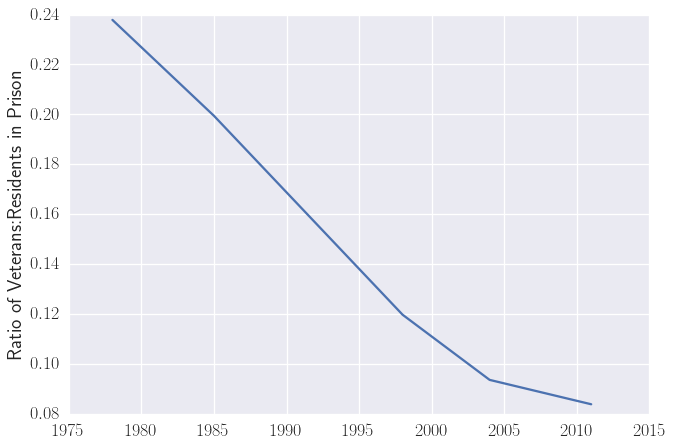

In [31]:
plt.plot(qq['Prison'].Year, (qq['Prison'].Veteran / qq['Prison'].Resident).values)
plt.ylabel('Ratio of Veterans:Residents in Prison')

# Adjust for per capita

In [116]:
!open . 

In [113]:
qq['Population']

,Year,Resident,Veteran
0,1978,157810300,29984000
1,1985,176370700,27857000
2,1998,201576800,25062000
3,2004,220832100,23427600
4,2011,241419000,21230900


In [32]:
qq['Prison']

,Year,Resident,Veteran
0,1978,307300,73100
1,1985,502500,100200
2,1998,1307200,156400
3,2004,1497100,140000
4,2011,1570400,131500


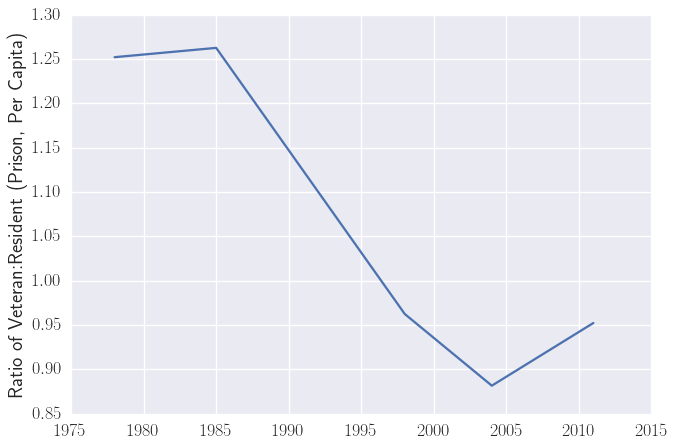

In [33]:
adjPrison = qq['Prison'] / qq['Population']
plt.plot(qq['Prison'].Year, adjPrison['Veteran'] / adjPrison['Resident'])
plt.ylabel('Ratio of Veteran:Resident (Prison, Per Capita)')

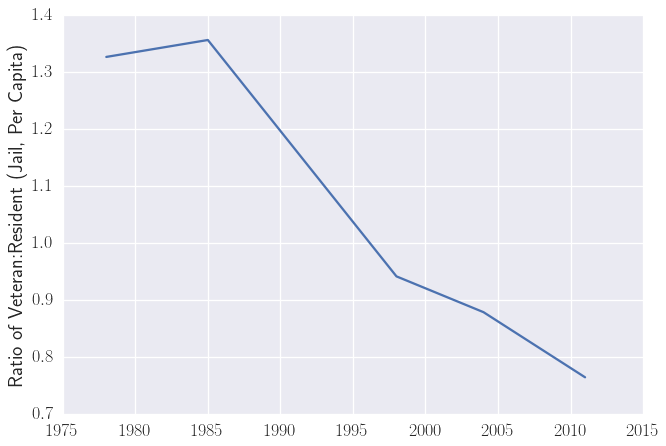

In [34]:
adjJail = qq['Jail'] / qq['Population']
plt.plot(qq['Jail'].Year, adjJail['Veteran'] / adjJail['Resident'])
plt.ylabel('Ratio of Veteran:Resident (Jail, Per Capita)')